In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3]:
BTC = pd.read_csv('BTC_train.csv')
testBTC = pd.read_csv('BTC_test.csv')

In [4]:
BTC['log_ret'] = np.log(BTC.close) - np.log(BTC.close.shift(1))
testBTC['log_ret'] = np.log(testBTC.close) - np.log(testBTC.close.shift(1))

BTC['n5_sd'] = BTC['close'].rolling(5).std(ddof=1).shift(-5)
testBTC['n5_sd'] = testBTC['close'].rolling(5).std(ddof=1).shift(-5)

BTC['n10_sd'] = BTC['close'].rolling(10).std(ddof=1).shift(-10)
testBTC['n10_sd'] = testBTC['close'].rolling(10).std(ddof=1).shift(-10)

BTC['n20_sd'] = BTC['close'].rolling(20).std(ddof=1).shift(-20)
testBTC['n20_sd'] = testBTC['close'].rolling(20).std(ddof=1).shift(-20)

BTC['n30_sd'] = BTC['close'].rolling(30).std(ddof=1).shift(-30)
testBTC['n30_sd'] = testBTC['close'].rolling(30).std(ddof=1).shift(-30)

BTC

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,SMA_20,SMA_60,RSI,log_ret,n5_sd,n10_sd,n20_sd,n30_sd
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,28519.3540,28650.364333,58.451852,NaN,31.413174,108.271401,102.425398,99.048277
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,28536.3845,28644.548500,58.720242,0.000165,17.101093,116.419081,100.201088,100.724233
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,28561.6520,28638.428667,53.156234,-0.002486,56.760266,114.972900,98.961488,104.250880
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,28585.1790,28633.124833,54.504338,0.000723,83.064195,105.568031,96.578699,111.343180
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,28604.8735,28627.540667,55.513597,0.000529,96.347026,91.885585,93.121995,117.204367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,34516.4125,34658.780333,32.301918,-0.000683,NaN,NaN,NaN,NaN
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,34489.3265,34647.939167,31.019205,-0.000963,NaN,NaN,NaN,NaN
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,34460.3260,34637.647833,37.223747,0.002224,NaN,NaN,NaN,NaN
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,34434.1240,34629.811167,35.903240,-0.000844,NaN,NaN,NaN,NaN


In [5]:
redditDataTrain_flair = pd.read_pickle('redditDataTrainF.pkl')
redditDataTrain_vadar = pd.read_pickle('redditDataTrain_vader.pkl')
redditDataTrain_transformer = pd.read_pickle('redditDataTrain_transformer.pkl')

In [6]:
redditDataTrain_vadar

,score,body,created,created_date,created_time,created_datetime,created_datetime_5m,created_datetime_30m,created_datetime_60m,compound,sentiment
613,1,"I'm sorry, but I set a reminder, and this hurt...",1.609451e+09,2020-12-31,21:41:44,2020-12-31 21:41:44,2020-12-31 21:44:59.999,2020-12-31 21:59:59.999,2020-12-31 21:59:59.999,-0.7259,NEGATIVE
720,1,Unlikely,1.612948e+09,2021-02-10,09:06:05,2021-02-10 09:06:05,2021-02-10 09:09:59.999,2021-02-10 09:29:59.999,2021-02-10 09:59:59.999,0.0000,NEUTRAL
1052,2,Thank you (sincerely) -- this comment saved me...,1.609866e+09,2021-01-05,17:04:34,2021-01-05 17:04:34,2021-01-05 17:04:59.999,2021-01-05 17:29:59.999,2021-01-05 17:59:59.999,0.8126,POSITIVE
1210,2,Cheers. Happy to be helpful.,1.609868e+09,2021-01-05,17:38:03,2021-01-05 17:38:03,2021-01-05 17:39:59.999,2021-01-05 17:59:59.999,2021-01-05 17:59:59.999,0.8625,POSITIVE
2857,2,Thank you! Very cool of you. I also managed to...,1.609389e+09,2020-12-31,04:25:04,2020-12-31 04:25:04,2020-12-31 04:29:59.999,2020-12-31 04:29:59.999,2020-12-31 04:59:59.999,0.6885,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
5807,1,"When i'll enter again, i'll definetely buy som...",1.652106e+09,2022-05-09,14:27:11,2022-05-09 14:27:11,2022-05-09 14:29:59.999,2022-05-09 14:29:59.999,2022-05-09 14:59:59.999,0.0000,NEUTRAL
5808,1,Not worth the risk imo but that’s your money s...,1.652163e+09,2022-05-10,06:04:21,2022-05-10 06:04:21,2022-05-10 06:04:59.999,2022-05-10 06:29:59.999,2022-05-10 06:59:59.999,0.8911,POSITIVE
5809,1,LoL 🤣,1.652120e+09,2022-05-09,18:12:55,2022-05-09 18:12:55,2022-05-09 18:14:59.999,2022-05-09 18:29:59.999,2022-05-09 18:59:59.999,0.7184,POSITIVE
5810,1,well you're just causing fud and its annoying,1.652108e+09,2022-05-09,14:56:18,2022-05-09 14:56:18,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,2022-05-09 14:59:59.999,-0.4019,NEGATIVE


In [7]:
redditDataTrain_vadar.score.value_counts()

2      1018066
3       698372
1       551951
4       294660
5       252481
        ...   
146          1
105          1
121          1
193          1
179          1
Name: score, Length: 201, dtype: int64

In [8]:
redditDataTrain_flair.sentiment.value_counts()

NEGATIVE    2011855
POSITIVE    1381276
Name: sentiment, dtype: int64

In [9]:
redditDataTrain_vadar.sentiment.value_counts()

POSITIVE    1441919
NEUTRAL     1279188
NEGATIVE     672024
Name: sentiment, dtype: int64

In [10]:
redditDataTrain_transformer.sentiment.value_counts()

NEGATIVE    2294875
POSITIVE    1098256
Name: sentiment, dtype: int64

In [11]:
def positive_cnt(l):
    return len([x for x in l if x=='POSITIVE'])
def positive_ratio(l):
    return len([x for x in l if x=='POSITIVE'])/len(l)
def negative_cnt(l):
    return len([x for x in l if x=='NEGATIVE'])
def negative_ratio(l):
    return len([x for x in l if x=='NEGATIVE'])/len(l)

In [12]:
score_lb = 0

reddit_cnt1a = redditDataTrain_flair[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1a.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_flair','reddit_positive_ratio_l5m_flair','reddit_negative_cnt_l5m_flair','reddit_negative_ratio_l5m_flair']

reddit_cnt1b = redditDataTrain_vadar[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1b.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_vadar','reddit_positive_ratio_l5m_vadar','reddit_negative_cnt_l5m_vadar','reddit_negative_ratio_l5m_vadar']

reddit_cnt1c = redditDataTrain_transformer[["created_datetime_5m",'sentiment']].pivot_table(index="created_datetime_5m", aggfunc=[len,positive_cnt,positive_ratio,negative_cnt,negative_ratio]).reset_index()
reddit_cnt1c.columns = ['created_datetime_5m','reddit_cnt_l5m','reddit_positive_cnt_l5m_transformer','reddit_positive_ratio_l5m_transformer','reddit_negative_cnt_l5m_transformer','reddit_negative_ratio_l5m_transformer']

In [13]:
reddit_cnt1a

,created_datetime_5m,reddit_cnt_l5m,reddit_positive_cnt_l5m_flair,reddit_positive_ratio_l5m_flair,reddit_negative_cnt_l5m_flair,reddit_negative_ratio_l5m_flair
0,2020-12-31 00:04:59.999,31,9,0.290323,22,0.709677
1,2020-12-31 00:09:59.999,24,13,0.541667,11,0.458333
2,2020-12-31 00:14:59.999,29,9,0.310345,20,0.689655
3,2020-12-31 00:19:59.999,23,9,0.391304,14,0.608696
4,2020-12-31 00:24:59.999,29,12,0.413793,17,0.586207
...,...,...,...,...,...,...
156570,2022-07-01 13:59:59.999,1,1,1.000000,0,0.000000
156571,2022-07-01 15:49:59.999,1,0,0.000000,1,1.000000
156572,2022-07-01 16:04:59.999,1,1,1.000000,0,0.000000
156573,2022-07-01 18:19:59.999,1,1,1.000000,0,0.000000


In [14]:
BTC3 = BTC.merge(reddit_cnt1a,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1b,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1c,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m'])
testBTC3 = testBTC.merge(reddit_cnt1a,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1b,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m']).merge(reddit_cnt1c,
          how='left',left_on=['close_time'],right_on=['created_datetime_5m'])


In [15]:
BTC3['reddit_net_sentiment_cnt_l5m_flair'] = BTC3['reddit_positive_cnt_l5m_flair'] - BTC3['reddit_negative_cnt_l5m_flair']
testBTC3['reddit_net_sentiment_cnt_l5m_flair'] = testBTC3['reddit_positive_cnt_l5m_flair'] - testBTC3['reddit_negative_cnt_l5m_flair']

BTC3['reddit_net_sentiment_cnt_l5m_vadar'] = BTC3['reddit_positive_cnt_l5m_vadar'] - BTC3['reddit_negative_cnt_l5m_vadar']
testBTC3['reddit_net_sentiment_cnt_l5m_vadar'] = testBTC3['reddit_positive_cnt_l5m_vadar'] - testBTC3['reddit_negative_cnt_l5m_vadar']

BTC3['reddit_net_sentiment_cnt_l5m_transformer'] = BTC3['reddit_positive_cnt_l5m_transformer'] - BTC3['reddit_negative_cnt_l5m_transformer']
testBTC3['reddit_net_sentiment_cnt_l5m_transformer'] = testBTC3['reddit_positive_cnt_l5m_transformer'] - testBTC3['reddit_negative_cnt_l5m_transformer']


BTC3

,close_time,open,high,low,close,volume,asset_volume,num_trades,taker_base_volume,taker_quote_volume,...,reddit_negative_ratio_l5m_vadar,created_datetime_5m,reddit_cnt_l5m,reddit_positive_cnt_l5m_transformer,reddit_positive_ratio_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_negative_ratio_l5m_transformer,reddit_net_sentiment_cnt_l5m_flair,reddit_net_sentiment_cnt_l5m_vadar,reddit_net_sentiment_cnt_l5m_transformer
0,2021-01-01 00:04:59.999,28782.01,28822.59,28680.00,28715.11,304.929700,8.765054e+06,7861.0,147.300875,4.234770e+06,...,0.066667,2021-01-01 00:04:59.999,15.0,9.0,0.600000,6.0,0.400000,7.0,7.0,3.0
1,2021-01-01 00:09:59.999,28715.11,28747.43,28682.08,28719.85,114.975754,3.302240e+06,4854.0,55.824544,1.603252e+06,...,0.142857,2021-01-01 00:09:59.999,21.0,5.0,0.238095,16.0,0.761905,-5.0,8.0,-11.0
2,2021-01-01 00:14:59.999,28719.60,28729.19,28615.82,28648.53,297.439485,8.525196e+06,6625.0,95.232507,2.729859e+06,...,0.172414,2021-01-01 00:14:59.999,29.0,18.0,0.620690,11.0,0.379310,5.0,11.0,7.0
3,2021-01-01 00:19:59.999,28648.52,28670.73,28555.00,28669.24,282.759330,8.089119e+06,7206.0,114.174529,3.266808e+06,...,0.000000,2021-01-01 00:19:59.999,10.0,5.0,0.500000,5.0,0.500000,4.0,6.0,0.0
4,2021-01-01 00:24:59.999,28670.46,28707.97,28640.41,28684.40,201.782478,5.786963e+06,6022.0,110.317977,3.163787e+06,...,0.000000,2021-01-01 00:24:59.999,4.0,3.0,0.750000,1.0,0.250000,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52004,2021-06-30 23:39:59.999,34216.26,34257.34,34185.31,34192.90,367.881220,1.258392e+07,5443.0,159.427323,5.453778e+06,...,0.090909,2021-06-30 23:39:59.999,22.0,7.0,0.318182,15.0,0.681818,0.0,7.0,-8.0
52005,2021-06-30 23:44:59.999,34196.69,34233.63,34151.61,34159.99,313.158017,1.070354e+07,5488.0,126.737120,4.332220e+06,...,0.185185,2021-06-30 23:44:59.999,27.0,10.0,0.370370,17.0,0.629630,-3.0,9.0,-7.0
52006,2021-06-30 23:49:59.999,34160.00,34294.55,34083.92,34236.05,497.524263,1.700623e+07,8950.0,255.037100,8.720469e+06,...,0.187500,2021-06-30 23:49:59.999,16.0,5.0,0.312500,11.0,0.687500,-6.0,5.0,-6.0
52007,2021-06-30 23:54:59.999,34236.04,34310.00,34199.99,34207.17,402.434706,1.378380e+07,4143.0,220.415923,7.548294e+06,...,0.150000,2021-06-30 23:54:59.999,20.0,6.0,0.300000,14.0,0.700000,2.0,3.0,-8.0


In [20]:
BTC3.columns

Index(['close_time', 'open', 'high', 'low', 'close', 'volume', 'asset_volume',
       'num_trades', 'taker_base_volume', 'taker_quote_volume', 'SMA_20',
       'SMA_60', 'RSI', 'log_ret', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd',
       'created_datetime_5m_x', 'reddit_cnt_l5m_x',
       'reddit_positive_cnt_l5m_flair', 'reddit_positive_ratio_l5m_flair',
       'reddit_negative_cnt_l5m_flair', 'reddit_negative_ratio_l5m_flair',
       'created_datetime_5m_y', 'reddit_cnt_l5m_y',
       'reddit_positive_cnt_l5m_vadar', 'reddit_positive_ratio_l5m_vadar',
       'reddit_negative_cnt_l5m_vadar', 'reddit_negative_ratio_l5m_vadar',
       'created_datetime_5m', 'reddit_cnt_l5m',
       'reddit_positive_cnt_l5m_transformer',
       'reddit_positive_ratio_l5m_transformer',
       'reddit_negative_cnt_l5m_transformer',
       'reddit_negative_ratio_l5m_transformer',
       'reddit_net_sentiment_cnt_l5m_flair',
       'reddit_net_sentiment_cnt_l5m_vadar',
       'reddit_net_sentiment_cnt_l5m_transf

In [21]:
BTC3[['reddit_positive_cnt_l5m_flair', 'reddit_negative_cnt_l5m_flair', 'reddit_cnt_l5m_x', 'reddit_net_sentiment_cnt_l5m_flair', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_flair,reddit_negative_cnt_l5m_flair,reddit_cnt_l5m_x,reddit_net_sentiment_cnt_l5m_flair,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_flair,1.000000,0.656380,0.876040,0.076317,0.165869,0.009422,0.025383,-0.010019,-0.014788,-0.025709,-0.025093
reddit_negative_cnt_l5m_flair,0.656380,1.000000,0.938831,-0.702137,0.069276,-0.001829,0.087135,0.037850,0.036518,0.033399,0.039440
reddit_cnt_l5m_x,0.876040,0.938831,1.000000,-0.413976,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_flair,0.076317,-0.702137,-0.413976,1.000000,0.064991,0.011310,-0.091205,-0.059481,-0.062224,-0.068414,-0.075817
close,0.165869,0.069276,0.119997,0.064991,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.009422,-0.001829,0.003132,0.011310,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.025383,0.087135,0.067284,-0.091205,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,-0.010019,0.037850,0.019621,-0.059481,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,-0.014788,0.036518,0.016592,-0.062224,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.025709,0.033399,0.009612,-0.068414,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [22]:
BTC3[['reddit_positive_cnt_l5m_vadar', 'reddit_negative_cnt_l5m_vadar', 'reddit_cnt_l5m_y', 'reddit_net_sentiment_cnt_l5m_vadar', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_vadar,reddit_negative_cnt_l5m_vadar,reddit_cnt_l5m_y,reddit_net_sentiment_cnt_l5m_vadar,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_vadar,1.000000,0.573389,0.880498,0.727511,0.163007,0.006214,0.040824,0.010339,0.007811,-0.001345,-0.001323
reddit_negative_cnt_l5m_vadar,0.573389,1.000000,0.792746,-0.144960,0.008642,-0.003674,0.100182,0.054855,0.055168,0.054663,0.064106
reddit_cnt_l5m_y,0.880498,0.792746,1.000000,0.399493,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_vadar,0.727511,-0.144960,0.399493,1.000000,0.189624,0.010581,-0.034594,-0.033451,-0.036768,-0.047407,-0.055298
close,0.163007,0.008642,0.119997,0.189624,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.006214,-0.003674,0.003132,0.010581,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.040824,0.100182,0.067284,-0.034594,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,0.010339,0.054855,0.019621,-0.033451,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,0.007811,0.055168,0.016592,-0.036768,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.001345,0.054663,0.009612,-0.047407,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [23]:
BTC3[['reddit_positive_cnt_l5m_transformer', 'reddit_negative_cnt_l5m_transformer', 'reddit_cnt_l5m_y', 'reddit_net_sentiment_cnt_l5m_transformer', 'close', 'log_ret', 'volume', 'n5_sd', 'n10_sd', 'n20_sd', 'n30_sd']].corr()

,reddit_positive_cnt_l5m_transformer,reddit_negative_cnt_l5m_transformer,reddit_cnt_l5m_y,reddit_net_sentiment_cnt_l5m_transformer,close,log_ret,volume,n5_sd,n10_sd,n20_sd,n30_sd
reddit_positive_cnt_l5m_transformer,1.000000,0.639679,0.834109,-0.150543,0.153735,0.008683,0.025180,-0.013316,-0.020384,-0.031538,-0.031514
reddit_negative_cnt_l5m_transformer,0.639679,1.000000,0.957545,-0.856181,0.086866,-0.000174,0.080600,0.034300,0.033774,0.029878,0.035640
reddit_cnt_l5m_y,0.834109,0.957545,1.000000,-0.670883,0.119997,0.003132,0.067284,0.019621,0.016592,0.009612,0.013757
reddit_net_sentiment_cnt_l5m_transformer,-0.150543,-0.856181,-0.670883,1.000000,-0.008385,0.006061,-0.086739,-0.053067,-0.057144,-0.059634,-0.067028
close,0.153735,0.086866,0.119997,-0.008385,1.000000,0.006067,-0.224716,-0.025089,-0.034163,-0.035552,-0.037255
log_ret,0.008683,-0.000174,0.003132,0.006061,0.006067,1.000000,-0.021611,-0.059119,-0.054375,-0.037290,-0.028226
volume,0.025180,0.080600,0.067284,-0.086739,-0.224716,-0.021611,1.000000,0.372562,0.332736,0.290578,0.270192
n5_sd,-0.013316,0.034300,0.019621,-0.053067,-0.025089,-0.059119,0.372562,1.000000,0.722684,0.480102,0.405682
n10_sd,-0.020384,0.033774,0.016592,-0.057144,-0.034163,-0.054375,0.332736,0.722684,1.000000,0.706472,0.553267
n20_sd,-0.031538,0.029878,0.009612,-0.059634,-0.035552,-0.037290,0.290578,0.480102,0.706472,1.000000,0.840753


In [20]:
BTC3.drop(BTC3.columns[[i for i in range(1,18)]],axis=1).to_csv("redditSentiment_5m_sum1.csv")
testBTC3.drop(BTC3.columns[[i for i in range(1,18)]],axis=1).to_csv("redditSentiment_5m_sum2.csv")

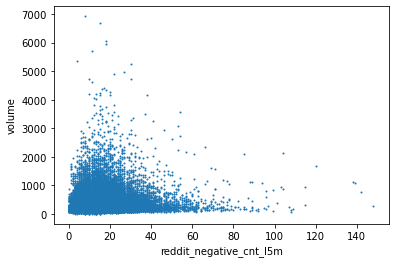

In [26]:
BTC3.plot.scatter(x = 'reddit_negative_cnt_l5m', y = 'volume', s = 1);

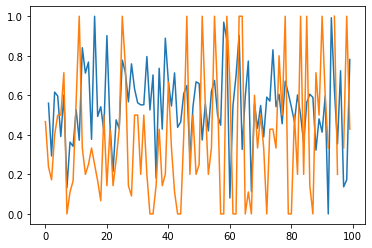

In [62]:
plt.plot(scaler.fit_transform(BTC3[['log_ret','inclined_sentiment_l5m']].head(100)))

In [21]:
BTC3[['close_time','reddit_cnt_l5m','reddit_positive_cnt_l5m','reddit_negative_cnt_l5m']]#.to_csv('reddit_train.csv')

,close_time,reddit_cnt_l5m,reddit_positive_cnt_l5m,reddit_negative_cnt_l5m
0,2021-01-01 00:04:59.999,15.0,11.0,4.0
1,2021-01-01 00:09:59.999,21.0,8.0,13.0
2,2021-01-01 00:14:59.999,29.0,17.0,12.0
3,2021-01-01 00:19:59.999,10.0,7.0,3.0
4,2021-01-01 00:24:59.999,4.0,3.0,1.0
...,...,...,...,...
52004,2021-06-30 23:39:59.999,22.0,11.0,11.0
52005,2021-06-30 23:44:59.999,27.0,12.0,15.0
52006,2021-06-30 23:49:59.999,16.0,5.0,11.0
52007,2021-06-30 23:54:59.999,20.0,11.0,9.0


In [22]:
testBTC3[['close_time','reddit_cnt_l5m','reddit_positive_cnt_l5m','reddit_negative_cnt_l5m']]#.to_csv('reddit_test.csv')

,close_time,reddit_cnt_l5m,reddit_positive_cnt_l5m,reddit_negative_cnt_l5m
0,2021-07-01 00:04:59.999,75.0,48.0,27.0
1,2021-07-01 00:09:59.999,42.0,24.0,18.0
2,2021-07-01 00:14:59.999,40.0,21.0,19.0
3,2021-07-01 00:19:59.999,37.0,15.0,22.0
4,2021-07-01 00:24:59.999,28.0,12.0,16.0
...,...,...,...,...
104846,2022-06-30 07:44:59.999,12.0,5.0,7.0
104847,2022-06-30 07:49:59.999,10.0,2.0,8.0
104848,2022-06-30 07:54:59.999,10.0,5.0,5.0
104849,2022-06-30 07:59:59.999,14.0,5.0,9.0
